In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('Data.xlsx')
df.head()

,OrderDate,Region,Rep,Item,Units,UnitCost,Total,Unnamed: 7,Unnamed: 8
0,2018-01-06,East,Jones,Pencil,95,1.99,189.05,NaN,How many units were sold for the East region f...
1,2018-01-23,Central,Kivell,Binder,50,19.99,999.50,NaN,Visualize the top 3 Reps according to their sa...
2,2018-02-09,Central,Jardine,Pencil,36,4.99,179.64,NaN,Create a visualization using a slicer to sort ...
3,2018-02-26,Central,Gill,Pen,27,19.99,539.73,NaN,Compare the sales for 2018 vs 2019 using a hor...
4,2018-03-15,West,Sorvino,Pencil,56,2.99,167.44,NaN,Create a chart to sort the sale for all reps o...


In [3]:
df.shape

(43, 9)

In [4]:
df.isnull().sum()

OrderDate      0
Region         0
Rep            0
Item           0
Units          0
UnitCost       0
Total          0
Unnamed: 7    43
Unnamed: 8    37
dtype: int64

In [5]:
df = df.drop('Unnamed: 7', axis=1)
df = df.drop('Unnamed: 8', axis=1)
df.isnull().sum()

OrderDate    0
Region       0
Rep          0
Item         0
Units        0
UnitCost     0
Total        0
dtype: int64

In [6]:
df.head()

,OrderDate,Region,Rep,Item,Units,UnitCost,Total
0,2018-01-06,East,Jones,Pencil,95,1.99,189.05
1,2018-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2018-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2018-02-26,Central,Gill,Pen,27,19.99,539.73
4,2018-03-15,West,Sorvino,Pencil,56,2.99,167.44


In [7]:
df = pd.get_dummies(df, columns=['Region'])
df.head()

,OrderDate,Rep,Item,Units,UnitCost,Total,Region_Central,Region_East,Region_West
0,2018-01-06,Jones,Pencil,95,1.99,189.05,0,1,0
1,2018-01-23,Kivell,Binder,50,19.99,999.50,1,0,0
2,2018-02-09,Jardine,Pencil,36,4.99,179.64,1,0,0
3,2018-02-26,Gill,Pen,27,19.99,539.73,1,0,0
4,2018-03-15,Sorvino,Pencil,56,2.99,167.44,0,0,1


In [8]:
years = []
for index, row in df.iterrows(): 
    years.append(df.loc[index, 'OrderDate'].year)
df['year'] = years
df.head(10)

,OrderDate,Rep,Item,Units,UnitCost,Total,Region_Central,Region_East,Region_West,year
0,2018-01-06,Jones,Pencil,95,1.99,189.05,0,1,0,2018
1,2018-01-23,Kivell,Binder,50,19.99,999.50,1,0,0,2018
2,2018-02-09,Jardine,Pencil,36,4.99,179.64,1,0,0,2018
3,2018-02-26,Gill,Pen,27,19.99,539.73,1,0,0,2018
4,2018-03-15,Sorvino,Pencil,56,2.99,167.44,0,0,1,2018
5,2018-04-01,Jones,Binder,60,4.99,299.40,0,1,0,2018
6,2018-04-18,Andrews,Pencil,75,1.99,149.25,1,0,0,2018
7,2018-05-05,Jardine,Pencil,90,4.99,449.10,1,0,0,2018
8,2018-05-22,Thompson,Pencil,32,1.99,63.68,0,0,1,2018
9,2018-06-08,Jones,Binder,60,8.99,539.40,0,1,0,2018


In [9]:
units_2019=0
for index, row in df.iterrows(): 
    if(df.loc[index, 'Region_East']==1 and df.loc[index, 'year']==2019):
        units_2019+=df.loc[index,'Units']

**Units sold for the East region for 2019**

In [10]:
print(units_2019)

162


In [11]:
reps = df.Rep.unique()

In [12]:
df.set_index("Rep", inplace=True)
df.head()

,OrderDate,Item,Units,UnitCost,Total,Region_Central,Region_East,Region_West,year
Rep,,,,,,,,,
Jones,2018-01-06,Pencil,95,1.99,189.05,0,1,0,2018
Kivell,2018-01-23,Binder,50,19.99,999.50,1,0,0,2018
Jardine,2018-02-09,Pencil,36,4.99,179.64,1,0,0,2018
Gill,2018-02-26,Pen,27,19.99,539.73,1,0,0,2018
Sorvino,2018-03-15,Pencil,56,2.99,167.44,0,0,1,2018


In [13]:
d = {}
for i in reps:
    d[i] = df.loc[i, 'Total'].sum()

In [14]:
df2 = pd.DataFrame(list(d.items()))
df2.head()

,0,1
0,Jones,2363.04
1,Kivell,3109.44
2,Jardine,2812.19
3,Gill,1749.87
4,Sorvino,1283.61


**Top 3 Reps according to their sales**

In [15]:
df2.nlargest(3,1)

,0,1
1,Kivell,3109.44
9,Parent,3102.30
2,Jardine,2812.19


In [16]:
df = df.reset_index()
df.head()

,Rep,OrderDate,Item,Units,UnitCost,Total,Region_Central,Region_East,Region_West,year
0,Jones,2018-01-06,Pencil,95,1.99,189.05,0,1,0,2018
1,Kivell,2018-01-23,Binder,50,19.99,999.50,1,0,0,2018
2,Jardine,2018-02-09,Pencil,36,4.99,179.64,1,0,0,2018
3,Gill,2018-02-26,Pen,27,19.99,539.73,1,0,0,2018
4,Sorvino,2018-03-15,Pencil,56,2.99,167.44,0,0,1,2018


**Total sales per region**

In [17]:
east, central, west = 0, 0, 0

for index, row in df.iterrows():
    if(df.loc[index, 'Region_East']==1):
        east += row['Total']
    elif(df.loc[index, 'Region_Central']==1):
        central += row['Total']
    elif(df.loc[index, 'Region_West']==1):
        west += row['Total']
print('sales east region: ' + str(east))
print('sales central region: ' + str(central))
print('sales west region: ' + str(west))

sales east region: 6002.09
sales central region: 11139.069999999998
sales west region: 2486.7200000000003


**Total sales per year**

In [18]:
sales_2018, sales_2019 = 0, 0

for index, row in df.iterrows():
    if(df.loc[index, 'year']==2018):
        sales_2018 += row['Total']
    else: 
        sales_2019 += row['Total']

print('sales 2018: ' + str(sales_2018))
print('sales 2019: ' + str(sales_2019))

sales 2018: 9258.34
sales 2019: 10369.539999999997


In [19]:
df.head()

,Rep,OrderDate,Item,Units,UnitCost,Total,Region_Central,Region_East,Region_West,year
0,Jones,2018-01-06,Pencil,95,1.99,189.05,0,1,0,2018
1,Kivell,2018-01-23,Binder,50,19.99,999.50,1,0,0,2018
2,Jardine,2018-02-09,Pencil,36,4.99,179.64,1,0,0,2018
3,Gill,2018-02-26,Pen,27,19.99,539.73,1,0,0,2018
4,Sorvino,2018-03-15,Pencil,56,2.99,167.44,0,0,1,2018


In [20]:
dict_sales = {}
for index, row in df.iterrows():
    key = row['Rep']
    date = df.loc[index,'OrderDate']
    sales = df.loc[index,'Total']
    if key in dict_sales:
        dict_sales[key].append((date, sales))
    else:
        dict_sales[key] = [(date, sales)]

In [21]:
print(dict_sales)

{'Jones': [(Timestamp('2018-01-06 00:00:00'), 189.05), (Timestamp('2018-04-01 00:00:00'), 299.4), (Timestamp('2018-06-08 00:00:00'), 539.4), (Timestamp('2018-08-15 00:00:00'), 174.65), (Timestamp('2018-09-18 00:00:00'), 255.84), (Timestamp('2018-10-22 00:00:00'), 575.36), (Timestamp('2019-02-18 00:00:00'), 19.96), (Timestamp('2019-07-04 00:00:00'), 309.38)], 'Kivell': [(Timestamp('2018-01-23 00:00:00'), 999.5), (Timestamp('2018-11-25 00:00:00'), 479.04), (Timestamp('2019-06-17 00:00:00'), 625.0), (Timestamp('2019-08-07 00:00:00'), 1005.9)], 'Jardine': [(Timestamp('2018-02-09 00:00:00'), 179.64), (Timestamp('2018-05-05 00:00:00'), 449.1), (Timestamp('2019-03-24 00:00:00'), 249.5), (Timestamp('2019-11-17 00:00:00'), 54.89), (Timestamp('2019-12-04 00:00:00'), 1879.06)], 'Gill': [(Timestamp('2018-02-26 00:00:00'), 539.73), (Timestamp('2019-01-15 00:00:00'), 413.54), (Timestamp('2019-05-14 00:00:00'), 68.37), (Timestamp('2019-05-31 00:00:00'), 719.2), (Timestamp('2019-09-10 00:00:00'), 9.03

In [40]:
d_items = dict_sales.items()
dates = []
amounts = []
dates2 = []
amounts2 = []

for key, value in d_items:
    for j in range(len(value)):
        date, amount = value[j]
        if(date.year == 2018):
            dates.append(date.month)
            amounts.append(amount)
        else:
            dates2.append(date.month)
            amounts2.append(amount)

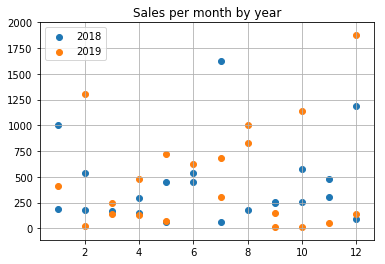

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter(dates, amounts, label='2018')
plt.scatter(dates2, amounts2, label='2019')
ax.legend()
ax.grid(True)
plt.title("Sales per month by year")
plt.show()